Trans =  0.5239233032
Gauche =  0.476076699778


(0.0, 0.02)

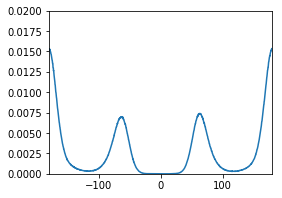

In [57]:
from glob import glob
import numpy
import math
import matplotlib 
import scipy

data = []

for f in glob('/home/oeghlido/development/TDF/tdf*.txt'):
    data.append(numpy.genfromtxt(f))
    
tdf = numpy.mean(data, axis=0)
phi = tdf[:,0]
vtdf = tdf[:,1]

mask1 = abs(phi) > 120
area1 = vtdf[mask].sum()*(phi[1] - phi[0])

mask2 = abs(phi) < 120
area2 = vtdf[mask2].sum()*(phi[1] - phi[0])

#print(mask)
print('Trans = ',area1)
print('Gauche = ',area2)


T60x, T60y = [], []
T180x, T180y = [], []
i = 0
for i in range(len(tdf)):
    if(abs(tdf[i,0]))< 120.0:
        T60x.append(tdf[i,0]) 
        T60y.append(tdf[i,1])
    elif(abs(tdf[i,0])>120 and abs(tdf[i,0]<180)):
        T180x.append(tdf[i,0])
        T180y.append(tdf[i,1])
        
def integral(x, y):
    area = 0
    for i in range(len(x)-1):
        area = area + (x[i+1]-x[i])*(y[i+1]+y[i])/2
    return area

A60 = integral(T60x, T60y)
A180 = integral(T180x,T180y)

#print(A60)
#print(A180)

pyplot.figure(figsize=(4,3))
pyplot.plot(tdf[:,0], tdf[:,1])
pyplot.xlim(-180, 180)
pyplot.ylim(0.0, 0.02)    
